In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
ts_prices = pd.read_csv("Data/Time_Series/prices/bitcoin.csv",index_col='date',parse_dates=['date'])
ts_pos = pd.read_csv("Data/Time_Series/crypto_bitcoin/positive_proportion.csv",index_col='posted_on',parse_dates=['posted_on'])

In [18]:
ts_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [20]:
ts_prices.describe()

,price
count,365.000000
mean,28296.800712
std,10236.056993
min,15742.440000
25%,19563.770000
50%,23203.680000
75%,39200.300000
max,47816.080000


In [21]:
ts_pos.describe()

,Positive
count,365.000000
mean,32.425096
std,6.351662
min,15.000000
25%,27.780000
50%,32.200000
75%,37.040000
max,53.660000


In [73]:
ts_prices_m = ts_prices[ts_prices.index.is_month_start]
ts_pos_m = ts_pos[ts_pos.index.is_month_start]

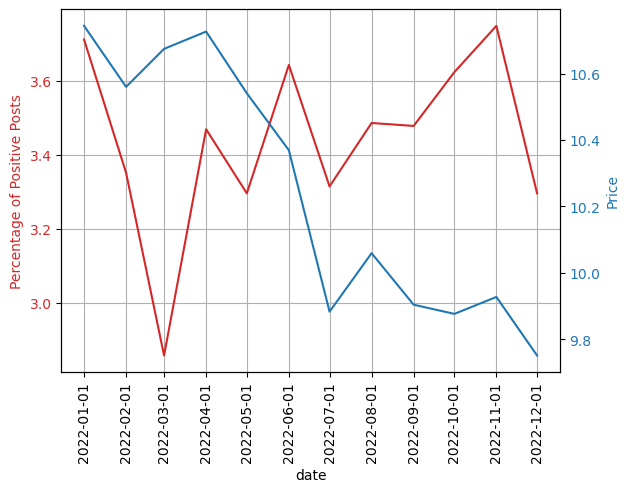

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices_m['price'])
data2 = np.log(ts_pos_m['Positive'])
# days = mdates.drange(ts_prices_m.index.min(),ts_prices_m.index.max()+dt.timedelta(months=1),dt.timedelta(months=1))
# days
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Percentage of Positive Posts', color=color)
ax1.plot(ts_prices_m.index, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_pos_m.index, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', labelrotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.figure().set_figwidth(20)
plt.xticks(ts_pos_m.index)
plt.grid()
plt.show()

In [99]:
ts_prices_w = ts_prices[ts_prices.index.dayofweek == 0]
ts_pos_w = ts_pos[ts_pos.index.dayofweek == 0]

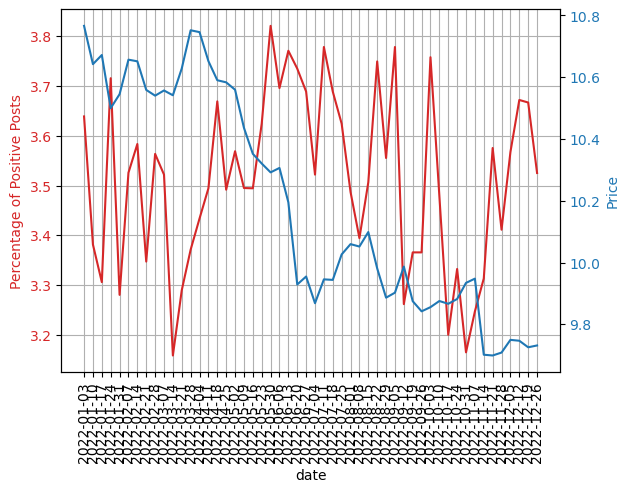

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


data1 = np.log(ts_prices_w['price'])
data2 = np.log(ts_pos_w['Positive'])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Percentage of Positive Posts', color=color)
ax1.plot(ts_prices_w.index, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_pos_w.index, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', labelrotation=90)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.xticks(ts_pos_w.index)
plt.grid()
plt.show()